# image classification of fashion MNIST using convolutional neural network 

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import sklearn
import pandas as pd

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## load fashion MNIST dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

## scale dataset

In [6]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## build model

In [8]:
#convolutional neural network (CNN)

In [9]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

## compile model

In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

## train model

In [11]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 39s 21ms/step - loss: 1.0566 - accuracy: 0.6216 - val_loss: 0.3768 - val_accuracy: 0.8670
Epoch 2/10
1719/1719 [==============================] - 35s 20ms/step - loss: 0.4435 - accuracy: 0.8523 - val_loss: 0.3165 - val_accuracy: 0.8830
Epoch 3/10
1719/1719 [==============================] - 35s 20ms/step - loss: 0.3738 - accuracy: 0.8760 - val_loss: 0.3276 - val_accuracy: 0.8810
Epoch 4/10
1719/1719 [==============================] - 35s 20ms/step - loss: 0.3333 - accuracy: 0.8866 - val_loss: 0.2906 - val_accuracy: 0.8932
Epoch 5/10
1719/1719 [==============================] - 35s 20ms/step - loss: 0.3181 - accuracy: 0.8914 - val_loss: 0.2959 - val_accuracy: 0.8954
Epoch 6/10
1719/1719 [==============================] - 35s 20ms/step - loss: 0.2815 - accuracy: 0.9029 - val_loss: 0.2872 - val_accuracy: 0.8942
Epoch 7/10
1719/1719 [==============================] - 35s 20ms/step - loss: 0.2687 - accuracy: 0.9076 - val_loss: 0.2877 -

## learning curves

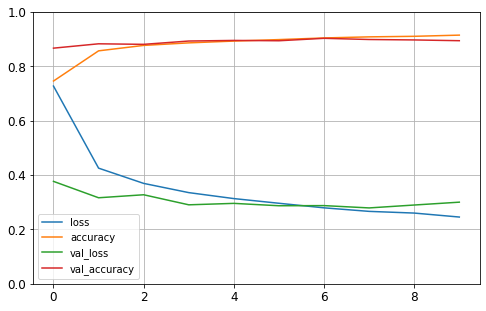

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
val_acc = history.history['val_accuracy']

In [15]:
np.argmax(val_acc) #epoch position of maximum; attention: position counted from zero; training output counted from one.

6

In [16]:
round(np.max(val_acc),4)

0.9032

## evaluate model

In [17]:
#check generalization accuracy on the test set

In [42]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2981 - accuracy: 0.8972


In [43]:
round(score[1],4)

0.8972

## prediction

In [44]:
X_new = X_test[:10]  #new instances taken from test set

In [45]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [46]:
y_test[:10]  #check prediction

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [22]:
np.array(class_names)[y_pred]  #convert class index to class name

array(['Ankle boot'], dtype='<U11')

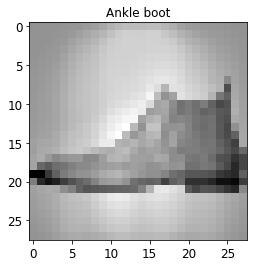

In [41]:
plt.imshow(X_new[0,...,0], cmap="binary", interpolation="nearest")
plt.title(class_names[y_test[0]], fontsize=12)
plt.show()